In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load your DataFrame (replace 'your_data.csv' with your actual data file)
view = pd.read_csv('3.1_LDA_results.csv')

# Display the first few rows of the DataFrame
view.head()


,Unnamed: 0,Company,Company description,Cleaned Description,Software Development and Security,Online Services and Sales,Healthcare and Senior Living,Education and Listing,Information Consulting and Research,Branded Manufacturing,...,Stock Exchanges and Components,Retail Stores and Brands,Real Estate Development,Corporate Rankings,Payments and Credit Processing,Industrial Equipment Manufacturing,Telecommunications and Solar,Automotive and Transportation,Industrial Manufacturing,Marketing and Risk Management
0,0,3D Systems,"3D Systems, headquartered in Rock Hill, South ...",carolina engineers manufactures sells printers...,0.185315,0.158462,0.008031,0.000175,0.000983,0.000176,...,0.000414,0.000852,0.000177,0.000150,0.046721,0.021413,0.001127,0.002201,0.107248,0.032075
1,1,3M,3M Company (originally the Minnesota Mining an...,mining manufacturing conglomerate worker healt...,0.000209,0.000126,0.141748,0.001335,0.000147,0.001622,...,0.000099,0.000457,0.000240,0.000238,0.000406,0.490034,0.000116,0.048138,0.001998,0.001210
2,2,A. O. Smith,A. O. Smith Corporation is an American manufac...,manufacturer residential heaters boilers manuf...,0.000135,0.000243,0.001053,0.000315,0.003462,0.049494,...,0.001321,0.003837,0.023135,0.000299,0.000273,0.001312,0.000223,0.000779,0.479247,0.000263
3,3,A10 Networks,A10 Networks is an American public company spe...,manufacturing application delivery controllers...,0.328233,0.255016,0.000286,0.003295,0.000790,0.001651,...,0.079658,0.000262,0.000316,0.000268,0.019051,0.000591,0.000349,0.000281,0.196364,0.001513
4,4,AAR Corp,AAR CORP. is a private provider of aviation se...,corp aviation servicesaar wood dale suburb nea...,0.000305,0.000548,0.000466,0.000509,0.004919,0.000511,...,0.000675,0.001148,0.001001,0.000437,0.000615,0.283798,0.000503,0.000458,0.003840,0.000503


In [6]:

# Summary statistics of numerical columns
print("\nSummary Statistics:")
view.describe()



Summary Statistics:


,Unnamed: 0,Software Development and Security,Online Services and Sales,Healthcare and Senior Living,Education and Listing,Information Consulting and Research,Branded Manufacturing,Mining and Resources,Corporate Transactions,Home Construction and Retail,...,Stock Exchanges and Components,Retail Stores and Brands,Real Estate Development,Corporate Rankings,Payments and Credit Processing,Industrial Equipment Manufacturing,Telecommunications and Solar,Automotive and Transportation,Industrial Manufacturing,Marketing and Risk Management
count,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,...,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000
mean,739.000000,0.043224,0.023938,0.030786,0.028223,0.035690,0.025377,0.030616,0.041168,0.027666,...,0.036961,0.033709,0.028460,0.035191,0.049715,0.035774,0.027424,0.029541,0.044512,0.030485
std,427.094837,0.127215,0.082439,0.102601,0.093749,0.106825,0.085065,0.116747,0.103919,0.094315,...,0.099885,0.116666,0.094195,0.096196,0.180132,0.105739,0.097676,0.104336,0.119834,0.092981
min,0.000000,0.000007,0.000009,0.000012,0.000012,0.000010,0.000008,0.000011,0.000009,0.000013,...,0.000007,0.000010,0.000016,0.000007,0.000010,0.000006,0.000008,0.000007,0.000006,0.000012
25%,369.500000,0.000114,0.000164,0.000173,0.000146,0.000159,0.000155,0.000170,0.000139,0.000206,...,0.000178,0.000159,0.000173,0.000162,0.000160,0.000151,0.000153,0.000150,0.000137,0.000187
50%,739.000000,0.000375,0.000369,0.000486,0.000322,0.000670,0.000438,0.000427,0.000542,0.000756,...,0.000968,0.000482,0.000492,0.000474,0.000366,0.000790,0.000341,0.000401,0.000889,0.000498
75%,1108.500000,0.005252,0.002278,0.003846,0.001881,0.007765,0.002945,0.002329,0.014489,0.005054,...,0.011657,0.003244,0.003032,0.007512,0.002187,0.006492,0.001838,0.002940,0.011868,0.005278
max,1478.000000,0.912773,0.791815,0.885248,0.920136,0.998533,0.900754,0.997194,0.993675,0.988734,...,0.997474,0.985527,0.943184,0.997164,0.976703,0.992289,0.796547,0.853983,0.991241,0.852340


In [9]:
print("DataFrame Info:")
view.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           1479 non-null   int64  
 1   Company                              1479 non-null   object 
 2   Company description                  1435 non-null   object 
 3   Cleaned Description                  1435 non-null   object 
 4   Software Development and Security    1479 non-null   float64
 5   Online Services and Sales            1479 non-null   float64
 6   Healthcare and Senior Living         1479 non-null   float64
 7   Education and Listing                1479 non-null   float64
 8   Information Consulting and Research  1479 non-null   float64
 9   Branded Manufacturing                1479 non-null   float64
 10  Mining and Resources                 1479 non-null   float64
 11  Corporate Tran

In [42]:
sns.set_theme(style="darkgrid", palette="rocket", font_scale=1.2)
plt.rcParams['axes.facecolor'] = '#F0F0F0'

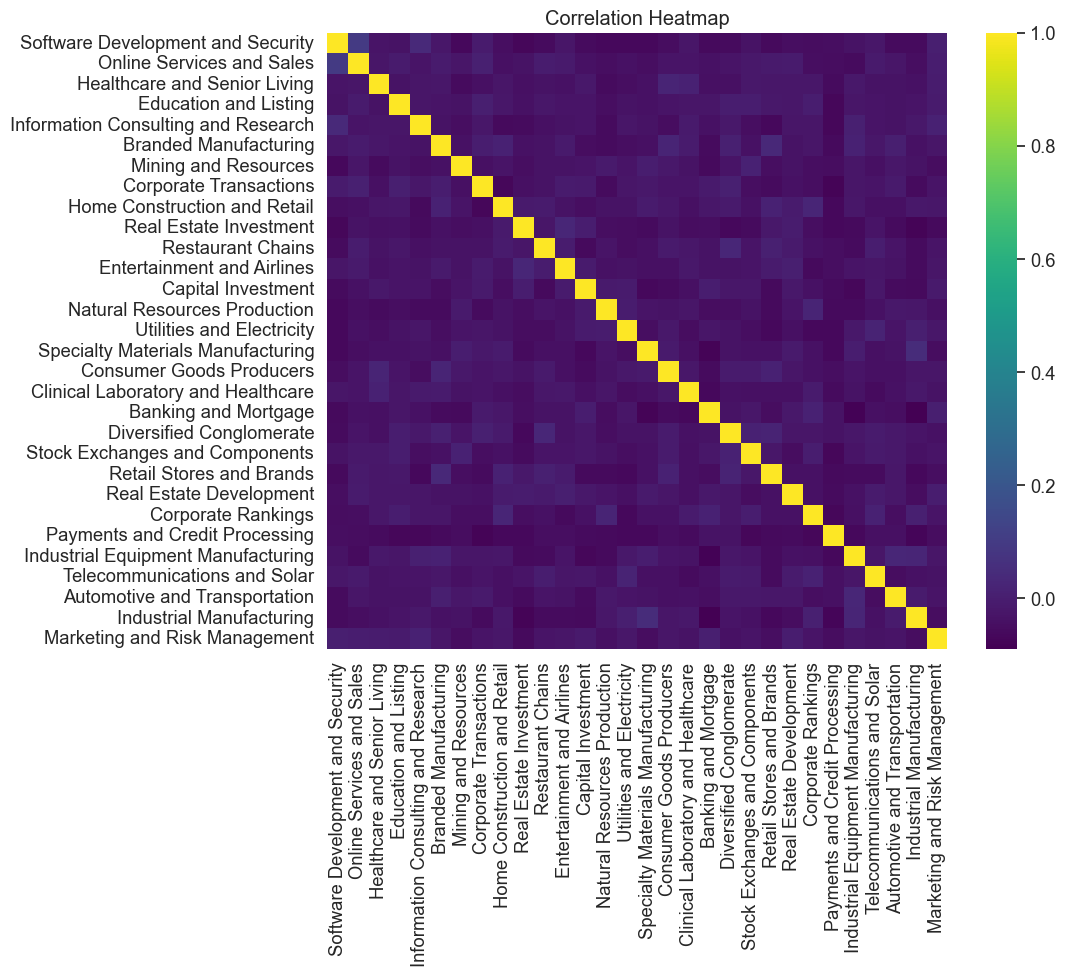

In [25]:
# Correlation heatmap for numerical features
float_columns = view.loc[:, view.dtypes == 'float64']
corr_matrix = float_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

This code extracts the absolute values of the correlations, sorts them in descending order, and displays the top 10 correlations along with the corresponding feature pairs in a table format.

In [17]:
top_corr_pairs = (corr_matrix.abs().unstack().sort_values(ascending=False)
                  .reset_index().rename(columns={0: 'Correlation'})
                  .head(50))

In [19]:
top_corr_pairs[top_corr_pairs["Correlation"] < 1 ]

,level_0,level_1,Correlation
30,Online Services and Sales,Software Development and Security,0.096118
31,Software Development and Security,Online Services and Sales,0.096118
32,Industrial Manufacturing,Banking and Mortgage,0.089429
33,Banking and Mortgage,Industrial Manufacturing,0.089429
34,Industrial Equipment Manufacturing,Banking and Mortgage,0.081154
35,Banking and Mortgage,Industrial Equipment Manufacturing,0.081154
36,Industrial Manufacturing,Real Estate Investment,0.079067
37,Real Estate Investment,Industrial Manufacturing,0.079067
38,Specialty Materials Manufacturing,Banking and Mortgage,0.078396
39,Banking and Mortgage,Specialty Materials Manufacturing,0.078396


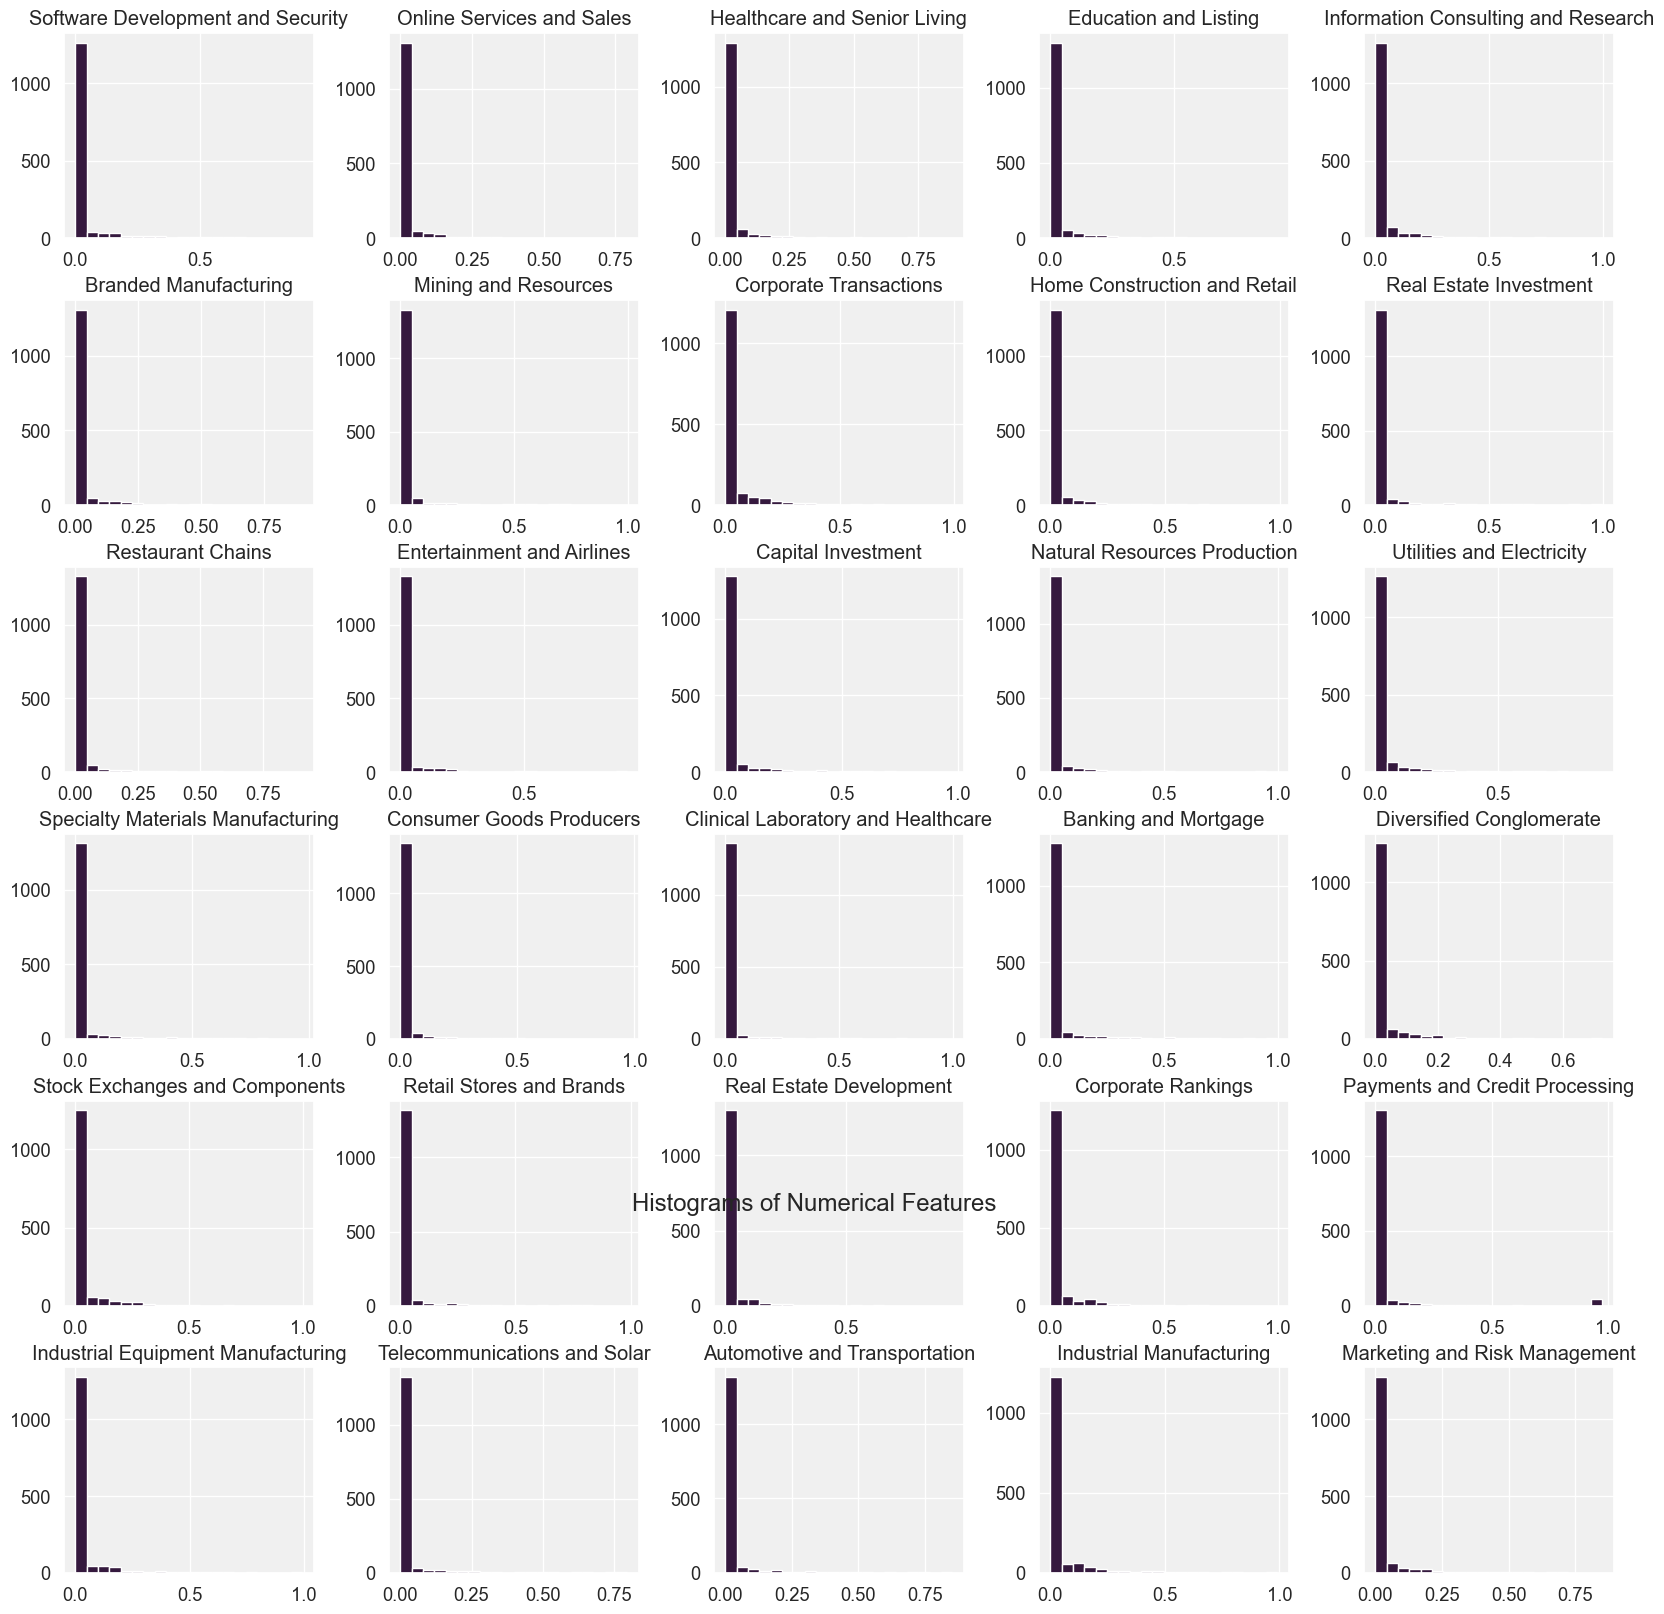

In [43]:
# Distribution of numerical features
float_columns[float_columns > 0].hist(bins=20, figsize=(20, 20))
plt.suptitle("Histograms of Numerical Features", y=0.3)
plt.show()

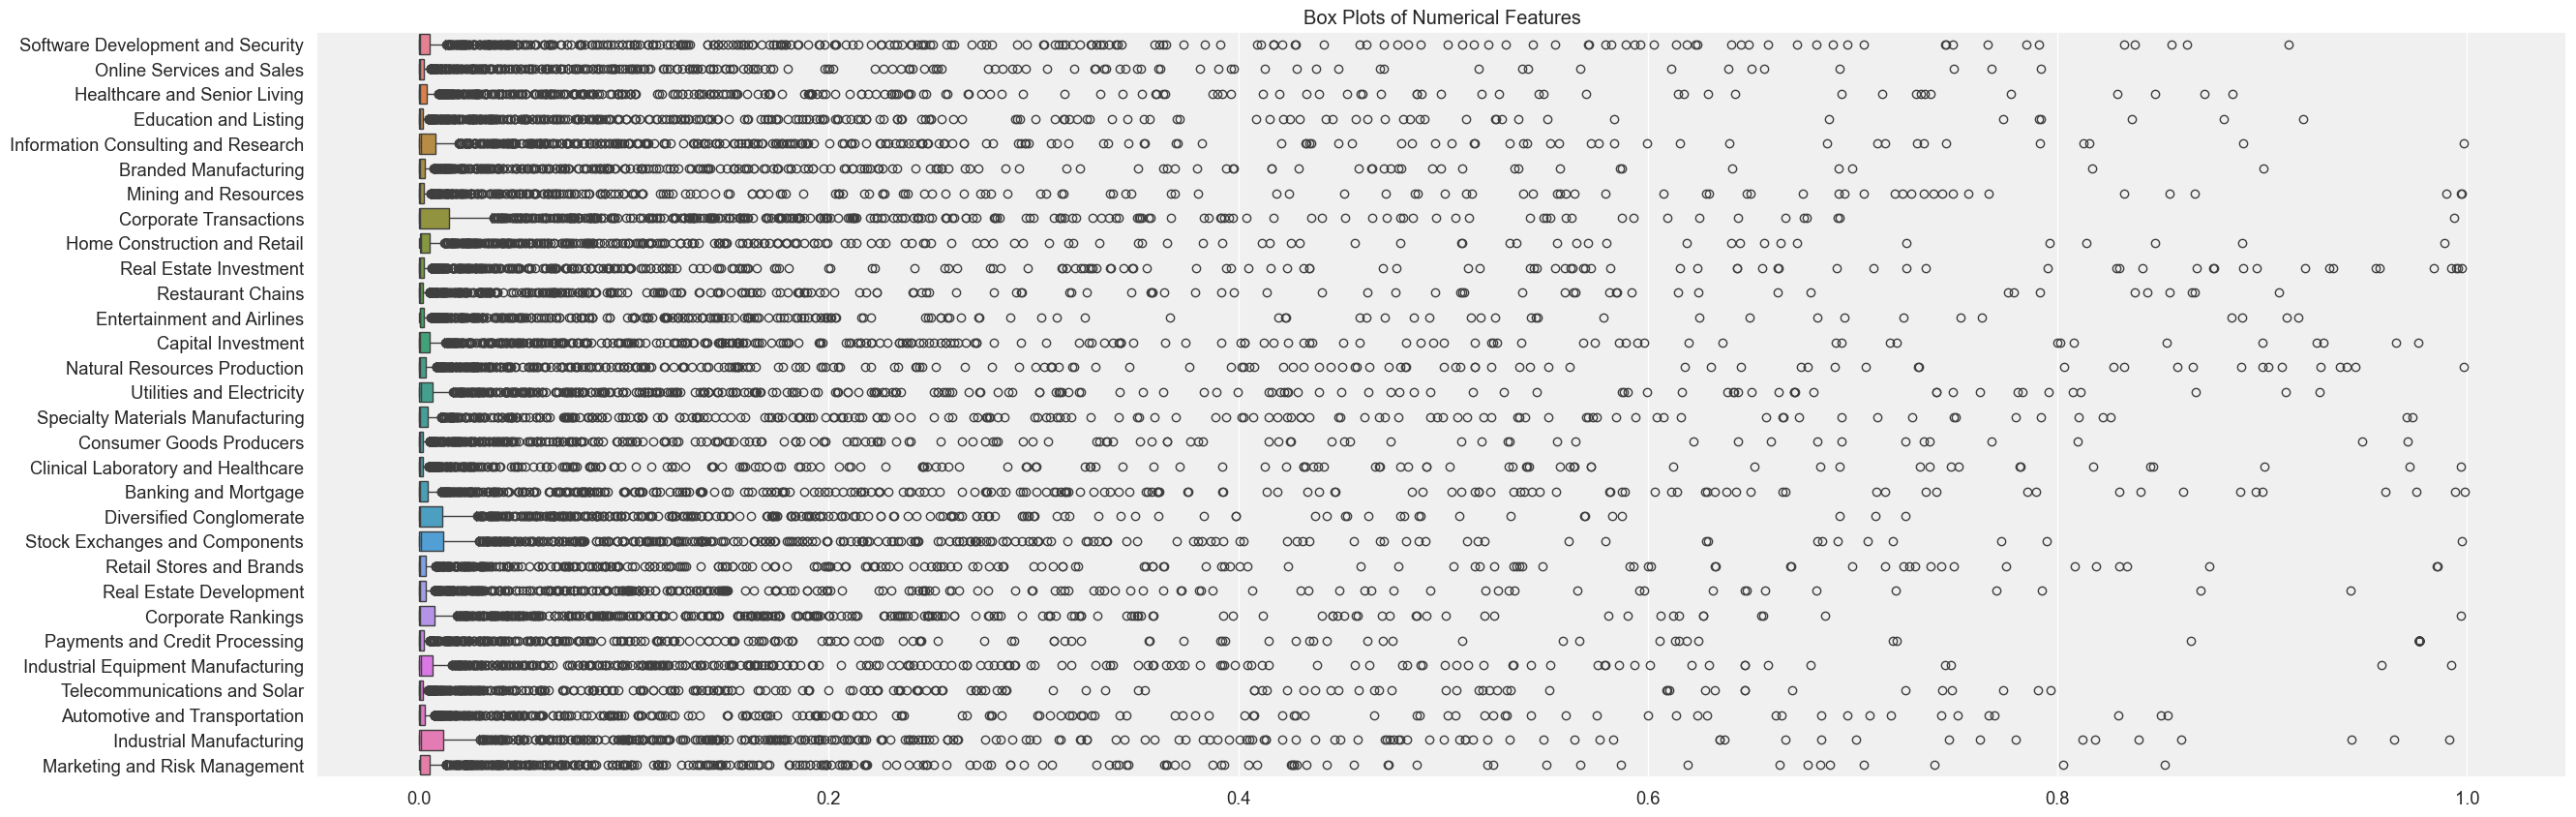

In [45]:
# Box plots for numerical features
plt.figure(figsize=(30, 10))
sns.boxplot(data=float_columns, orient="h")
plt.title("Box Plots of Numerical Features")
plt.show()

In [54]:
view["Automotive and Transportation"].describe()

count    1479.000000
mean        0.029541
std         0.104336
min         0.000007
25%         0.000150
50%         0.000401
75%         0.002940
max         0.853983
Name: Automotive and Transportation, dtype: float64

In [55]:
import numpy as np
view["Cleaned Description"][view["Automotive and Transportation"] > np.std(view["Automotive and Transportation"])]

8       abercrombie af lifestyle retailer focuses casu...
17      funds made diversified equity fund incnyse adx...
19      adient plc irishdomiciled manufactures automot...
23      auto parts automotive aftermarket parts caroli...
40      specialty manufacturing carolina divisions lit...
                              ...                        
1380    aviation aviation kenny dichter using membersh...
1398    worthington industries diversified manufacturi...
1403    xpo transportation conducts lessthantruckload ...
1416    integrated shipping commonly tsim biblical wor...
1430    att att article dealing whose ownership transf...
Name: Cleaned Description, Length: 109, dtype: object

In [57]:
view["Cleaned Description"][view["Banking and Mortgage"] > np.std(view["Banking and Mortgage"])]

44      part big five territorial real land materials ...
54      organized car banking via direct lending vehic...
81      annaly capital mortgage real trusts organized ...
84      plc britishamerican professional consulting ra...
95      asset corp mortgage real focuses investing mor...
                              ...                        
1372    alliance bancorporation regional list banks ra...
1395    seoulbased banking short history institution f...
1406    yadkin parent yadkin defunct regional assets b...
1409    manufacturer chests vacuuminsulated stainlesss...
1477    v wide labor law case concerning scope preempt...
Name: Cleaned Description, Length: 133, dtype: object

In [58]:
threshold = view["Banking and Mortgage"].quantile(0.75)

In [60]:
view["Cleaned Description"][view["Banking and Mortgage"] > threshold]

8       abercrombie af lifestyle retailer focuses casu...
10      plc irishamerican professional information con...
13      zrich parent covering property accident reinsu...
19      adient plc irishdomiciled manufactures automot...
22      adtalem education several forprofit higher edu...
                              ...                        
1396    softwareasaservice cloudbased connected report...
1401    xinyuan real co pinyin xnyun zhy real companyx...
1406    yadkin parent yadkin defunct regional assets b...
1409    manufacturer chests vacuuminsulated stainlesss...
1477    v wide labor law case concerning scope preempt...
Name: Cleaned Description, Length: 370, dtype: object